In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
results_dir = '/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/exp1'
results_path = os.path.join(results_dir, "exp1_second_results.csv")
csv_data = pd.read_csv(results_path)

In [7]:
csv_data.head()

,hardware,cuboid_name,array_shape,chunk_type,chunk_shape,optimized,buffer_size,nthreads,processing_time_split,processing_time_merge,diagnostics_split,diagnostics_merge,monitor_split,monitor_merge,success_run_split,success_run_merge
0,ssd,big,"(3500, 3500, 3500)",blocks,"(350, 350, 350)",False,15000000000,NaN,3793.3343,2331.5549,/home/gtimothee/outputs/2d7d490f-95f5-4846-9af...,/home/gtimothee/outputs/2d7d490f-95f5-4846-9af...,/home/gtimothee/outputs/2d7d490f-95f5-4846-9af...,/home/gtimothee/outputs/2d7d490f-95f5-4846-9af...,True,True
1,ssd,big,"(3500, 3500, 3500)",slabs,"(50, 3500, 3500)",False,15000000000,NaN,3556.9126,532.1945,/home/gtimothee/outputs/34e54f74-b37c-4438-8ee...,/home/gtimothee/outputs/34e54f74-b37c-4438-8ee...,/home/gtimothee/outputs/34e54f74-b37c-4438-8ee...,/home/gtimothee/outputs/34e54f74-b37c-4438-8ee...,True,True
2,ssd,big,"(3500, 3500, 3500)",blocks,"(875, 875, 875)",False,15000000000,NaN,3643.9940,656.6143,/home/gtimothee/outputs/a4941af8-c843-4f12-a69...,/home/gtimothee/outputs/a4941af8-c843-4f12-a69...,/home/gtimothee/outputs/a4941af8-c843-4f12-a69...,/home/gtimothee/outputs/a4941af8-c843-4f12-a69...,True,True
3,ssd,big,"(3500, 3500, 3500)",slabs,"(50, 3500, 3500)",True,15000000000,1.0,3545.7857,525.2598,/home/gtimothee/outputs/c2b2f8c5-e3b6-4007-8cd...,/home/gtimothee/outputs/c2b2f8c5-e3b6-4007-8cd...,/home/gtimothee/outputs/c2b2f8c5-e3b6-4007-8cd...,/home/gtimothee/outputs/c2b2f8c5-e3b6-4007-8cd...,True,True
4,ssd,big,"(3500, 3500, 3500)",blocks,"(500, 500, 500)",False,15000000000,NaN,3720.2483,806.3755,/home/gtimothee/outputs/542f3b51-5019-49fa-91e...,/home/gtimothee/outputs/542f3b51-5019-49fa-91e...,/home/gtimothee/outputs/542f3b51-5019-49fa-91e...,/home/gtimothee/outputs/542f3b51-5019-49fa-91e...,True,True


In [8]:
print("Number entries:", len(csv_data.index))

Number entries: 10


In [55]:
big_arr_data = csv_data[csv_data["cuboid_name"]=="big"]
big_arr_ssd = big_arr_data[big_arr_data["hardware"]=="ssd"].drop(columns=["hardware", 
    "diagnostics_split", 
    "diagnostics_merge",
    "monitor_split", 
    "monitor_merge",
    "cuboid_name",
    "array_shape",
    "buffer_size",
    "nthreads"])
big_arr_ssd_blocks = big_arr_ssd[big_arr_ssd["chunk_type"]=="blocks"].drop(columns=["chunk_type"])
big_arr_ssd_slabs = big_arr_ssd[big_arr_ssd["chunk_type"]=="slabs"].drop(columns=["chunk_type"])

In [56]:
big_arr_ssd_blocks_mean = big_arr_ssd_blocks.groupby(["chunk_shape", "optimized"]).mean()
big_arr_ssd_blocks_std = big_arr_ssd_blocks.groupby(["chunk_shape", "optimized"]).std()
big_arr_ssd_slabs_mean = big_arr_ssd_slabs.groupby(["chunk_shape", "optimized"]).mean()
big_arr_ssd_slabs_std = big_arr_ssd_slabs.groupby(["chunk_shape", "optimized"]).std()

In [57]:
big_arr_ssd_blocks_mean

processing_time_split  processing_time_merge  \
chunk_shape     optimized                                                 
(350, 350, 350) False                  3793.3343              2331.5549   
                True                   3640.8408              2317.8879   
(500, 500, 500) False                  3720.2483               806.3755   
                True                   3624.0364               802.9553   
(875, 875, 875) False                  3643.9940               656.6143   
                True                   3603.0829               678.7867   

                           success_run_split  success_run_merge  
chunk_shape     optimized                                        
(350, 350, 350) False                   True               True  
                True                    True               True  
(500, 500, 500) False                   True               True  
                True                    True               True  
(875, 875, 875) False                   True               True  
                True                    True               True

In [58]:
big_arr_ssd_slabs_mean

processing_time_split  processing_time_merge  \
chunk_shape      optimized                                                 
(28, 3500, 3500) False                  3553.9254               534.1883   
                 True                   3562.0140               533.0289   
(50, 3500, 3500) False                  3556.9126               532.1945   
                 True                   3545.7857               525.2598   

                            success_run_split  success_run_merge  
chunk_shape      optimized                                        
(28, 3500, 3500) False                   True               True  
                 True                    True               True  
(50, 3500, 3500) False                   True               True  
                 True                    True               True

In [52]:
blocks_mean_1 = big_arr_ssd_blocks_mean.xs('(350, 350, 350)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_mean_2 = big_arr_ssd_blocks_mean.xs('(500, 500, 500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_mean_3 = big_arr_ssd_blocks_mean.xs('(875, 875, 875)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_1 = big_arr_ssd_blocks_std.xs('(350, 350, 350)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_2 = big_arr_ssd_blocks_std.xs('(500, 500, 500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_3 = big_arr_ssd_blocks_std.xs('(875, 875, 875)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])

In [60]:
slabs_mean_1 = big_arr_ssd_slabs_mean.xs('(28, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_mean_2 = big_arr_ssd_slabs_mean.xs('(50, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_std_1 = big_arr_ssd_slabs_std.xs('(28, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_std_2 = big_arr_ssd_slabs_std.xs('(50, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])

Text(0.5, 0.98, 'Results of experiment 2 for blocks')

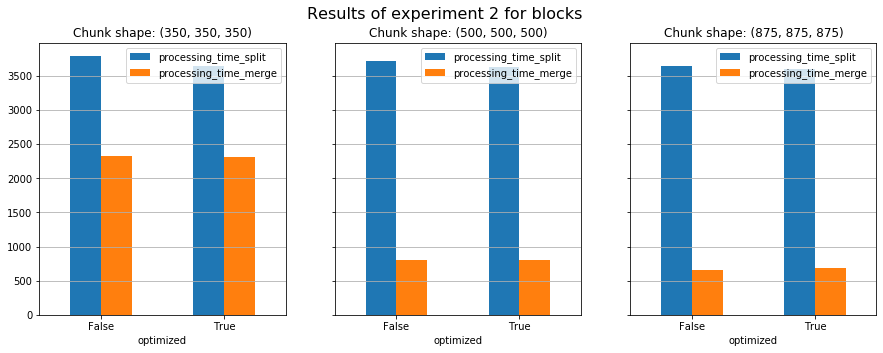

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
blocks_mean_1.plot(kind="bar", ax=axes[0], yerr=blocks_std_1, rot=0, title="Chunk shape: (350, 350, 350)")
blocks_mean_2.plot(kind="bar", ax=axes[1], yerr=blocks_std_2, rot=0, title="Chunk shape: (500, 500, 500)")
blocks_mean_3.plot(kind="bar", ax=axes[2], yerr=blocks_std_3, rot=0, title="Chunk shape: (875, 875, 875)")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
axes[2].grid(axis="y")
fig.suptitle('Results of experiment 2 for blocks', fontsize=16)

Text(0.5, 0.98, 'Results of experiment 2 for slabs')

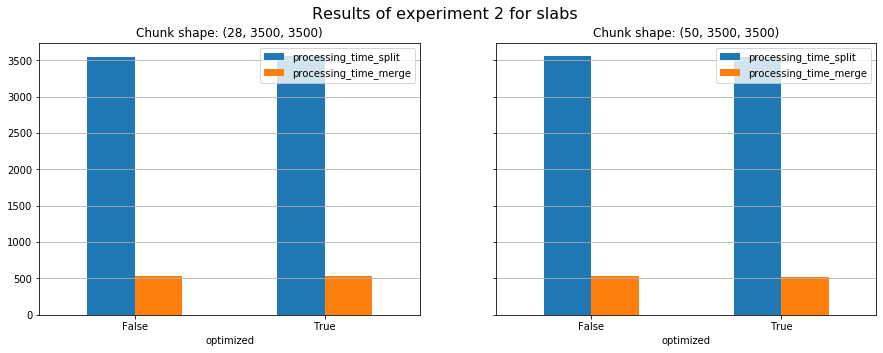

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
slabs_mean_1.plot(kind="bar", ax=axes[0], yerr=slabs_std_1, rot=0, title="Chunk shape: (28, 3500, 3500)")
slabs_mean_2.plot(kind="bar", ax=axes[1], yerr=slabs_std_2, rot=0, title="Chunk shape: (50, 3500, 3500)")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
fig.suptitle('Results of experiment 2 for slabs', fontsize=16)

In [8]:
imgfilepath = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/second.png"
fig.savefig(imgfilepath)